In [7]:
import pandas as pd
import numpy as mp
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, auc, precision_recall_curve, auc
import statsmodels.api as sm
import matplotlib.pyplot as plt

import lightgbm as lgb

In [8]:
## function for basic classification
def lgbmodel(x_train, y_train, x_val, y_val, x_test, y_test, variable):
    ## create classifier
    model = lgb.LGBMClassifier(learning_rate=0.14048611339776612, max_depth=12,
               min_child_weight=8.0, n_estimators=125, num_leaves=150,
               random_state=42, reg_alpha=1.5, reg_lambda=2,
               scale_pos_weight=5, verbosity=1, min_data_in_leaf=25,lambda_l2=0, lambda_l1 = 1.5)
  
               
    #model.fit(x_train, y_train)
    model.fit(x_train,y_train,eval_set=[(x_test,y_test),(x_train,y_train)],eval_metric='logloss')

    ## get validation and test predicition
    y_val_pred = model.predict(x_val)
    print('Accuracy of random forest classifier on validation set using {}: {:.2f}'.format(variable, metrics.accuracy_score(y_val, y_val_pred)))
   
    y_test_pred = model.predict(x_test)
    print('Accuracy of random forest classifier on test set using {}: {:.2f}'.format(variable, metrics.accuracy_score(y_test, y_test_pred)))

    ## define metrics for roc
    y_test_pred_proba = model.predict_proba(x_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_proba)
    rf_roc_auc = roc_auc_score(y_test, y_test_pred_proba)
    
    ## create roc curve  
    plt.rcParams["figure.figsize"] = (4,3)
 
    plt.figure()
    plt.plot(fpr, tpr, label = 'LightGBM Classifier (area = %0.2f)' % rf_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc = "lower right")
    plt.show()

    ## define metric for precision and recall
    precision, recall, thresholds = precision_recall_curve(y_test, y_test_pred_proba)
    auc_precision_recall = auc(recall, precision)

    ## create pr curve   
    plt.figure()
    plt.plot(recall, precision, label = 'LightGBM Classifier (area = %0.2f)' % auc_precision_recall)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall')
    plt.legend(loc = "lower right")
    plt.show()

In [11]:
## Load in Test Set
X_test_path = "X_test_enc.parquet"
X_test = pd.read_parquet(X_test_path)

y_test_path = "y_test.parquet"
y_test = pd.read_parquet(y_test_path)
y_test = pd.DataFrame(y_test['label'].astype(int)) ## convert labels to int for roc auc calculation

## Load in Validation Set
X_val_path = "X_val_enc.parquet"
X_val = pd.read_parquet(X_val_path)

y_val_path = "y_val.parquet"
y_val = pd.read_parquet(y_val_path)
y_val = pd.DataFrame(y_val['label'].astype(int))

y_train_path = "y_train.parquet"
y_train = pd.read_parquet(y_train_path)
y_train = pd.DataFrame(y_train['label'].astype(int))

In [12]:
## define columns to drop
cols_to_drop_25 = ['dwelling_time_-1_50', 'dwelling_time_-1_75', 'dwelling_time_-1_mean', 'std_-1_50', 'std_-1_75', 'std_-1_mean', 'mean_-1_50', 'mean_-1_75', 'mean_-1_mean',
                'dwelling_time_0_50', 'dwelling_time_0_75', 'dwelling_time_0_mean', 'std_0_50', 'std_0_75', 'std_0_mean', 'mean_0_50', 'mean_0_75', 'mean_0_mean',
                'dwelling_time_+1_50', 'dwelling_time_+1_75', 'dwelling_time_+1_mean', 'std_+1_50', 'std_+1_75', 'std_+1_mean', 'mean_+1_50', 'mean_+1_75', 'mean_+1_mean']

## dropping columns from X_validation set
X_val_25 = X_val.drop(columns = cols_to_drop_25, axis = 1)

## dropping columns from X_test set
X_test_25 = X_test.drop(columns = cols_to_drop_25, axis = 1)

## Load X_train_25
X_train_25_path = "X_train_25.parquet" ## to edit file path
X_train_25 = pd.read_parquet(X_train_25_path)

[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=1.5 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=2 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=1.5 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=2 will be ignored. Current value: lambda_l2=0
[LightGBM] [Info] Number of positive: 5483, number of negative: 24923
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002523 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2559
[LightGBM] [Info] Number of data points in the train set: 30406, number of used featu

[92]	training's binary_logloss: 0.11357	valid_0's binary_logloss: 0.205524
[93]	training's binary_logloss: 0.112307	valid_0's binary_logloss: 0.204141
[94]	training's binary_logloss: 0.111038	valid_0's binary_logloss: 0.204178
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[95]	training's binary_logloss: 0.109894	valid_0's binary_logloss: 0.202416
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[96]	training's binary_logloss: 0.108874	valid_0's binary_logloss: 0.202416
[97]	training's binary_logloss: 0.107763	valid_0's binary_logloss: 0.204367
[98]	training's binary_logloss: 0.106396	valid_0's binary_logloss: 0.204383
[99]	training's binary_logloss: 0.105345	valid_0's binary_logloss: 0.205193
[100]	training's binary_logloss: 0.103972	valid_0's binary_logloss: 0.205193
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[101]	training's binary_logloss: 0.10291	valid_0's binary_logloss: 0.207767
[LightGBM] [War

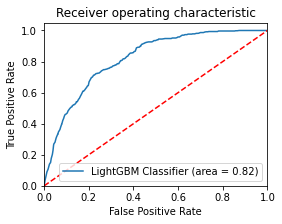

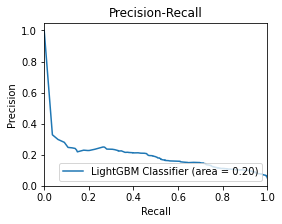

In [13]:
lgbmodel(X_train_25, y_train.values.ravel(), X_val_25, y_val.values.ravel(), X_test_25, y_test.values.ravel(), "25th quantile")

In [15]:
X_test_enc_1 = pd.read_parquet("X_test_enc_1.parquet")
X_test_enc_2 = pd.read_parquet("X_test_enc_2.parquet")
id_val_1 = pd.read_parquet("df_id_val_1.parquet")
id_val_2 = pd.read_parquet("df_id_val_2.parquet")

In [16]:
X_test_1_25 = X_test_enc_1.drop(columns = cols_to_drop_25, axis = 1)

In [17]:
X_test_1_25.shape

(90810, 38)

In [19]:
model = lgb.LGBMClassifier(learning_rate=0.14048611339776612, max_depth=12,
               min_child_weight=8.0, n_estimators=125, num_leaves=150,
               random_state=42, reg_alpha=1.5, reg_lambda=2,
               scale_pos_weight=5, verbosity=1, min_data_in_leaf=25,lambda_l2=0, lambda_l1 = 1.5)

[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=1.5 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=2 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=1.5 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=2 will be ignored. Current value: lambda_l2=0
[LightGBM] [Info] Number of positive: 5483, number of negative: 24923
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002618 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2559
[LightGBM] [Info] Number of data points in the train set: 30406, number of used featu

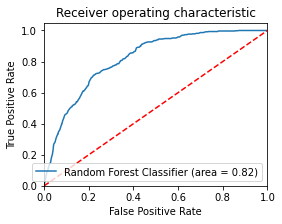

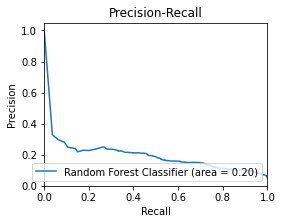

In [20]:
##here im just checking the clf model we fitting is the right one
model.fit(X_train_25, y_train.values.ravel())
variable = "25th percentile"
    ## get validation and test predicition
y_val_pred = model.predict(X_val_25)
print('Accuracy of random forest classifier on validation set using {}: {:.2f}'.format(variable, metrics.accuracy_score(y_val, y_val_pred)))
   
y_test_pred = model.predict(X_test_25)
print('Accuracy of random forest classifier on test set using {}: {:.2f}'.format(variable, metrics.accuracy_score(y_test, y_test_pred)))

    ## define metrics for roc
y_test_pred_proba = model.predict_proba(X_test_25)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_proba)
rf_roc_auc = roc_auc_score(y_test, y_test_pred_proba)
    
    ## create roc curve   
plt.figure()
plt.plot(fpr, tpr, label = 'Random Forest Classifier (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc = "lower right")
plt.show()

    ## define metric for precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_test_pred_proba)
auc_precision_recall = auc(recall, precision)

    ## create pr curve   
plt.figure()
plt.plot(recall, precision, label = 'Random Forest Classifier (area = %0.2f)' % auc_precision_recall)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall')
plt.legend(loc = "lower right")
plt.show()

In [21]:
y_test_pred_proba = model.predict_proba(X_test_1_25)[:,1]

In [22]:
res = pd.DataFrame(y_test_pred_proba,columns=['score'])

In [24]:
final_sub2 = pd.concat([id_val_1, res], axis=1)

In [25]:
final_sub2 = final_sub2.rename(columns={'transcript':'transcript_id','position':'transcript_position'})

In [26]:
final_sub2.to_csv('dataset1_submission2.csv')

In [27]:
X_test_2_25 = X_test_enc_2.drop(columns = cols_to_drop_25, axis = 1)

In [28]:
y_test_pred_proba2 = model.predict_proba(X_test_2_25)[:,1]

In [29]:
res2 = pd.DataFrame(y_test_pred_proba2,columns=['score'])

In [30]:
final_sub2_data2 = pd.concat([id_val_2, res2], axis=1)

In [31]:
final_sub22 = final_sub2_data2.rename(columns={'transcript':'transcript_id','position':'transcript_position'})

In [32]:
final_sub22.to_csv('dataset2_submission2.csv')

In [33]:
X_train_full = pd.read_parquet("X_train_full_enc.parquet")
df_id_val_full = pd.read_parquet("df_id_val_full.parquet")
X_train_full = X_train_full.drop(columns = cols_to_drop_25, axis = 1)
y_train_full = model.predict_proba(X_train_full)[:,1]

In [34]:
res0 = pd.DataFrame(y_train_full,columns=['score'])

In [35]:
train_full = pd.concat([df_id_val_full, res0], axis=1)

In [38]:
train_ful = train_full.rename(columns={'transcript':'transcript_id','position':'transcript_position'})

In [39]:
train_ful.to_csv('proj-acmxz_dataset0_2.csv')

In [40]:
train_ful.shape

(54079, 3)